In [1]:
import pandas as pd
import numpy as np


In [2]:
X = pd.read_csv("../Data/X_processed.csv")
y = pd.read_csv("../Data/y.csv").squeeze()  

print(X.shape)
print(y.value_counts())


(614, 16)
Risk
0    422
1    192
Name: count, dtype: int64


In [3]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print(y_train.value_counts())


Risk
0    337
1    154
Name: count, dtype: int64


In [4]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

print(y_train_sm.value_counts())


Risk
0    337
1    337
Name: count, dtype: int64


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_sm, y_train_sm)

lr_preds = lr.predict(X_val)

print("Logistic Regression")
print("Accuracy :", accuracy_score(y_val, lr_preds))
print("Precision:", precision_score(y_val, lr_preds))
print("Recall   :", recall_score(y_val, lr_preds))
print("F1 Score :", f1_score(y_val, lr_preds))


Logistic Regression
Accuracy : 0.7235772357723578
Precision: 0.5625
Recall   : 0.47368421052631576
F1 Score : 0.5142857142857142


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train_sm, y_train_sm)

rf_preds = rf.predict(X_val)

print("Random Forest")
print("Accuracy :", accuracy_score(y_val, rf_preds))
print("Precision:", precision_score(y_val, rf_preds))
print("Recall   :", recall_score(y_val, rf_preds))
print("F1 Score :", f1_score(y_val, rf_preds))


Random Forest
Accuracy : 0.8048780487804879
Precision: 0.71875
Recall   : 0.6052631578947368
F1 Score : 0.6571428571428571


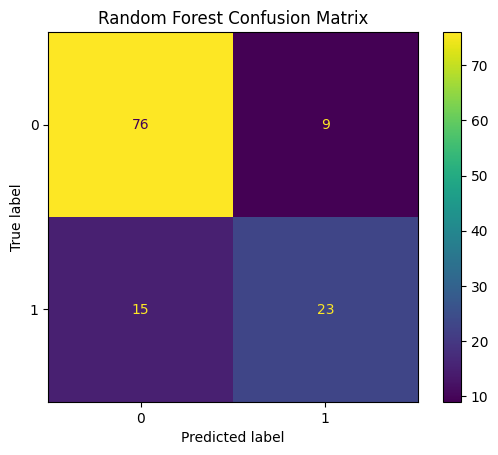

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, rf_preds)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()


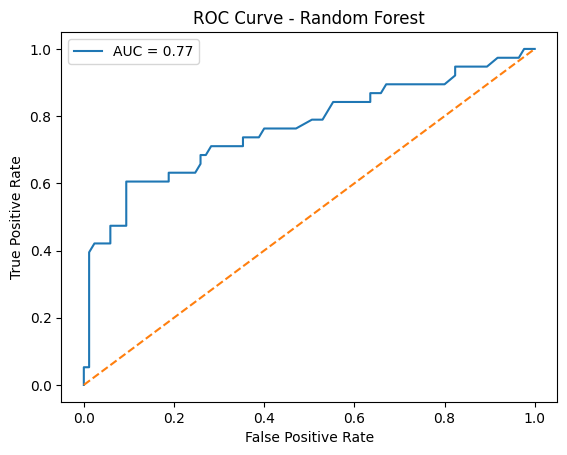

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score

rf_probs = rf.predict_proba(X_val)[:, 1]

fpr, tpr, _ = roc_curve(y_val, rf_probs)
auc = roc_auc_score(y_val, rf_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.show()


In [9]:
import pickle

with open("../model/credit_risk_model.pkl", "wb") as f:
    pickle.dump(rf, f)
